# Random Numbers and Radio Activity

## Decay of a Single Isotope Exaple

The radioisotope $^{209}Tl$ (thalium 208) decays in stable $^{208}Pb$ (lead 208) with a half-life of 3.053 minutes.  Suppose we start with a sample of 100 thalium atoms.  Let us simulate the decay of these atoms over time. mimicking the randomness of the decay using random numbers 


We want to simulate the decay of 100 atoms.  On average we know that the number $N$ of atoms in our sample will fall off exponentially over time according to the standard equation of radioactive decay:

$$ N(t)= N(0) 2^{-t/\tau}$$

where $\tau$ is the half life.   Then the fraction of atoms remaining after time t is $N(t)/N(0) = 2^{-t/\tau}$ and the fractionthat have decayed, which is equal to the probability $p(t)$ that any particular single atom has decayed, is one minus this number or

$$p(t) = 1 - 2^{-t/\tau}$$

Thus this number represents the probability that a single atom decays in a time interval of length $l$.

We will simulate the decay of our sample of 100 atoms by dividing the atoms into two sets, one of thallium and one of lead.  

6 94


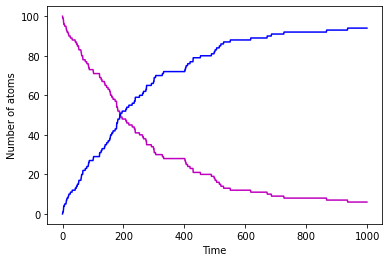

In [2]:
from random import random
from numpy import arange
from pylab import plot,xlabel,ylabel,show

# Constants
NTl = 100             # Initial Number of thallium atoms
NPb = 0               # Number of lead atoms
tau = 3.053*60        # Half life of thallium in seconds
h = 1.0               # Size of time-step in seconds
p = 1 - 2**(-h/tau)   # Probability of decay in one step
tmax = 1000           # Total time

# Lists of plot points
tpoints = arange(0.0,tmax,h) # make time array
Tlpoints = [] # empty array to strore # of Tl atoms at each time step
Pbpoints = [] # empty array to strore # of Pb atoms at each time step

# Main loop
for t in tpoints:    # for time 0-1000 sec
    Tlpoints.append(NTl) # append starting # of Tl atoms
    Pbpoints.append(NPb) # append starting # of Pb atoms

    # Calculate the number of atoms that decay
    decay = 0
    for i in range(NTl): # determine number of atoms that decay
        if random() < p:
            decay += 1
    NTl -= decay # subtract number of decayed Parent atoms 
    NPb += decay # add number of decayed Daughter atoms 

print(NTl,NPb)
# Make the graph
plot(tpoints,Tlpoints, c='m') # plot Tl vs. time
plot(tpoints,Pbpoints, c='b') # plot Pb vs. time
xlabel("Time")
ylabel("Number of atoms")
show()


If you up the number of atoms to 1,000 or 10,000 you'll see the mean exponential decay will become clearer, by at 100, you can see the stochatic nature of the individual decay times.

## Use this code as a basis of Problem 2 in HW \#9

NOTE: You will have additional decays, half-lives, and probabilities for the HW problem, be careful of the order of of what happens in each time step. 

100 0 0


ValueError: x and y must have same first dimension, but have shapes (1000,) and (1000000,)

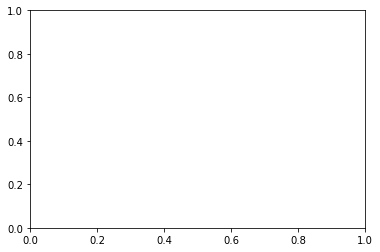

In [61]:
from random import random
NTl = 100
NPb = 0
NBi_fin = 0
tau_Tl = 2.2*60
tau_Pb = 3.3*60
h = 1.0
p_Tl = 1-2**(-h/tau_Tl)
p_Pb = 1-2**(-h/tau_Pb)
tmax = 1000

tpoints = arange(0.0,tmax,h)
Biintpoints = []
Tlpoints = []
Pbpoints = []
Bifinalpoints = []
    
for t in tpoints:
    Pbpoints.append(NPb)
    Bifinalpoints.append(NBi_fin)
    
    decay = 0
    for i in range(NPb):
        if random() < p_Pb:
            decay += 1
            
    NPb -= decay
    NBi_fin += decay
    
    for t in tpoints:
        Tlpoints.append(NTl)
        Pbpoints.append(NPb)
    
        decay = 0
        if i in range(NPb):
            if random() < p_Tl:
                decay += 1

        NTl -= decay
        NPb += decay

    
print(NTl,NPb,NBi_fin)

plot(tpoints, Tlpoints, c='b')
plot(tpoints, Pbpoints, c='m')
plot(tpoints, Bifinalpoints, c='y')
xlabel("Time")
ylabel("Number of atoms")
show()
        

In [20]:


while t in tpoints:
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)
    
    decay = 0
    for i in range(NPb):
        if random() < p_Tl:
            decay += 1
            
    NTl -= decay
    NPb += decay
    
print(NTl,NPb)

plot(tpoints, Tlpoints, c='b')
plot(tpoints, Pbpoints, c='m')
xlabel("Time")
ylabel("Number of atoms")
show()

KeyboardInterrupt: 

In [72]:
#monty hall game
import random
from random import randint

def no_prize_door(host, num_doors, player_choice):
    i = 1
    while(i==host or i==player_choice):
        i = (i+1)%(num_doors)
    
    return i

def switch_door(shown_door, num_doors, player_choice):
    i = 1
    while(i==shown_door or i==player_choice):
        i = (i+1)%(num_doors)
    
    return i

def monty_hall_game(switch, num_tests):
    
    win_switch = 0
    win_no_switch = 0
    lose_switch = 0
    lose_no_switch = 0
    
    doors = [0,1,2]
    num_doors = len(doors)
    
    for i in range(0, num_tests):
        door_with_prize = random.randint(0, num_doors-1)
        host = door_with_prize
        player_choice = random.randint(0, num_doors-1)
        int_player_choice = player_choice
        shown_door = no_prize_door(host, num_doors, player_choice)
        
        if switch == True:
            player_choice = switch_door(shown_door, num_doors, player_choice)
        
        if player_choice == door_with_prize and switch == False:
            
            #print("Player wins (no switch) - The player chose door #:", player_choice, "Original door choice:", int_player_choice, "Door with prize:", door_with_prize, "Shown Door:", shown_door)
            
            win_no_switch = win_no_switch +1
        
        elif player_choice == door_with_prize and switch == True:
            
            #print("Player wins (switch) - The player chose door #:", player_choice, "Original door choice:", int_player_choice, "Door with prize:", door_with_prize, "Shown Door:", shown_door)
            
            win_switch = win_switch +1
            
        elif player_choice != door_with_prize and switch == False:
            
            #print("Player loses (no switch) - The player chose door #:", player_choice, "Original door choice:", int_player_choice, "Door with prize:", door_with_prize, "Shown Door:", shown_door)
            
            lose_no_switch = lose_no_switch +1
            
        elif player_choice != door_with_prize and switch == True:
            
            #print("Player loses (no switch) - The player chose door #:", player_choice, "Original door choice:", int_player_choice, "Door with prize:", door_with_prize, "Shown Door:", shown_door)
            
            lose_switch = lose_switch +1

            
    return win_no_switch, win_switch, lose_no_switch, lose_switch, num_tests

x = monty_hall_game(True,1000)

print('Win switch %', x[1]/x[4])
print('lose switch %', x[3]/x[4])
print('Win no switch %', x[0]/x[4])
print('lose no switch %', x[2]/x[4])

Win switch % 0.649
lose switch % 0.351
Win no switch % 0.0
lose no switch % 0.0


In [ ]:
for t in tpoints:
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)
    
    decay = 0
    for i in range(NTl):
        if random() < p_Tl:
            decay += 1
    
    NTl -= decay
    NPb += decay
    
    plot(tpoints, Tlpoints, c='b')
    
    p_Bi = 1-2**(-h/tau_Bi)
    tau_Bi = 46.0*60